# Exploration and Skill Acquisition in a Major Online Game

* Tom Stafford; University of Sheffield, t.stafford@shef.ac.uk
* Sam Devlin; Digital Creativity Labs, University of York
* Anders Drachen; Digital Creativity Labs, University of York
* Rafet Sifa; Fraunhofer IAIS, Germany

### Tracking skill acquisition across 21,543 players of the first-person shooter game Destiny shows that variability in some – but not all – dimensions of practice enhances learning

### CogSci17: 39th Annual Meeting of the Cognitive Science Society, London, UK,  July 26th – July 29th, 2017
### Poster 140, Poster Session 1, Monarch Suite, Thursday, July 27, 1:20pm – 2:50pm

Paper: https://mindmodeling.org/cogsci2017/papers/0615/index.html  
Full scripts & sample data: https://osf.io/c59n9/  
Poster: http://tomstafford.staff.shef.ac.uk/docs/CogSci17_TomStafford.jpg  
This notebook: https://github.com/tomstafford/destiny/blob/master/variability.ipynb  

## Initialise

In [2]:
#libraries
# - standard
import os #directory and file functions
import socket #machine id
import pandas as pd #data munging 
import sys #for getting Python version
import numpy as np #number functions
import matplotlib #graphing settings
import pylab as plt #graphing functions
import scipy.stats as stats #statistical functions

#Using arrow instead of datetime because @treycausey told me to
#http://crsmithdev.com/arrow/
import arrow

# - bespoke
from destiny_funcs import maketime, ranker, tagger, correlate, findspacing

#suppress warnings, for tidyiness
import warnings; warnings.simplefilter('ignore')


print("Python version = " + sys.version)
print("working directory = " + os.getcwd())
print("Machine = " + socket.gethostname())

Python version = 3.5.2 (default, Nov 17 2016, 17:05:23) 
[GCC 5.4.0 20160609]
working directory = /home/tom/Dropbox/university/expts/destiny_public/destiny
Machine = tom-xps


In [30]:
# Parameters
logtransform = False

# Graph settings
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[18,12]
#all graphs to have same x y range
xmin=0.5 
xmax=1.1

cRmin=60;cRmax=130
if logtransform:
    cRmin=np.log(60);cRmax=np.log(130)

perfvar='combatRating' #'killsDeathsRatio'
if logtransform:
    perfvar='Ln_combatRating' #'killsDeathsRatio'

## The Data

In [4]:
#----------------- full data not publically available (sorry!), but we'll load summary data if we're not running locally

local=True
if local:
    filepath='../../destiny/data/validation_dataset/' #location of full dataset on Tom's machine
    dfilename='validation-dataset-rldat.csv' 
    gfilename='grimScore_validationPlayers.csv'
    pfilename='validation-dataset-entropyAcrossEventTypesForFirst25Days.csv'

df=pd.read_csv(filepath+dfilename) #main player data

gf=pd.read_csv(filepath+gfilename) #final grimoire score of each player
gf.columns= ['userid','grimscore']

pf=pd.read_csv(filepath+pfilename) #entropy across playmodes
pf.columns= ['userid','eventEntropy25']

In [5]:
df.head() #example of what the data look like (nb not all columns shown)

,destinyMembershipId,date,PvPEventCount,totalDeathDistance,activitiesWon,totalKillDistance,deaths,averageLifespan,objectivesCompleted,averageKillDistance,...,assists,resurrectionsReceived,activitiesEntered,score,averageScorePerLife,maximumWeaponLevel,allParticipantsCount,maximumPowerLevel,highestCharacterLevel,winLossRatio
0,4611686018428705658,2015-12-01T00:00:00Z,1,0,22,8023,216,75.723502,32,17.868597,...,90,16,31,93182,429.410138,0,245,0,40,2.444444
1,4611686018428705658,2015-12-02T00:00:00Z,2,0,0,275,17,39.555556,3,16.176471,...,6,0,1,3695,205.277778,0,16,0,40,0.000000
2,4611686018428705658,2015-12-03T00:00:00Z,3,0,1,254,1,193.500000,0,13.368421,...,1,0,1,2505,1252.500000,0,6,0,40,-1.000000
3,4611686018428705658,2015-12-04T00:00:00Z,4,0,18,5873,106,124.130841,0,30.273196,...,33,42,25,103,0.962617,0,150,0,40,2.571429
4,4611686018428705658,2015-12-08T00:00:00Z,5,0,7,2781,104,62.038095,1,17.490566,...,22,3,10,23625,225.000000,0,85,0,40,2.333333


## Data Munging

In [6]:
#our headings
cols=df.columns.values

print("Rows in dataset   = " + str(len(df)))
print("Unique player IDs = " + str(len(df[cols[0]].unique())))

#create a unique timestamp for each play
df['time'] =df.apply(maketime, axis=1)

#use this to create a sequential count of each game, for each player
df.sort_values('time', ascending=True, inplace=True)
df=df.groupby('destinyMembershipId').apply(ranker)
#now find some by player stats
df=df.groupby('destinyMembershipId').apply(tagger)

Rows in dataset   = 703602
Unique player IDs = 12861


In [31]:
#now let's filter players by minimum games played  and remove games beyond this
minimum_plays=49
sf=df[(df['max_plays']>minimum_plays) & (df['game_n']<(minimum_plays+2))]
labeltext=str(len(sf['destinyMembershipId'].unique())) + ' players'

if logtransform:
    sf['Ln_combatRating']=np.log(sf['combatRating'])

## Figure 1: Learning Curves

NOT DONE for nan


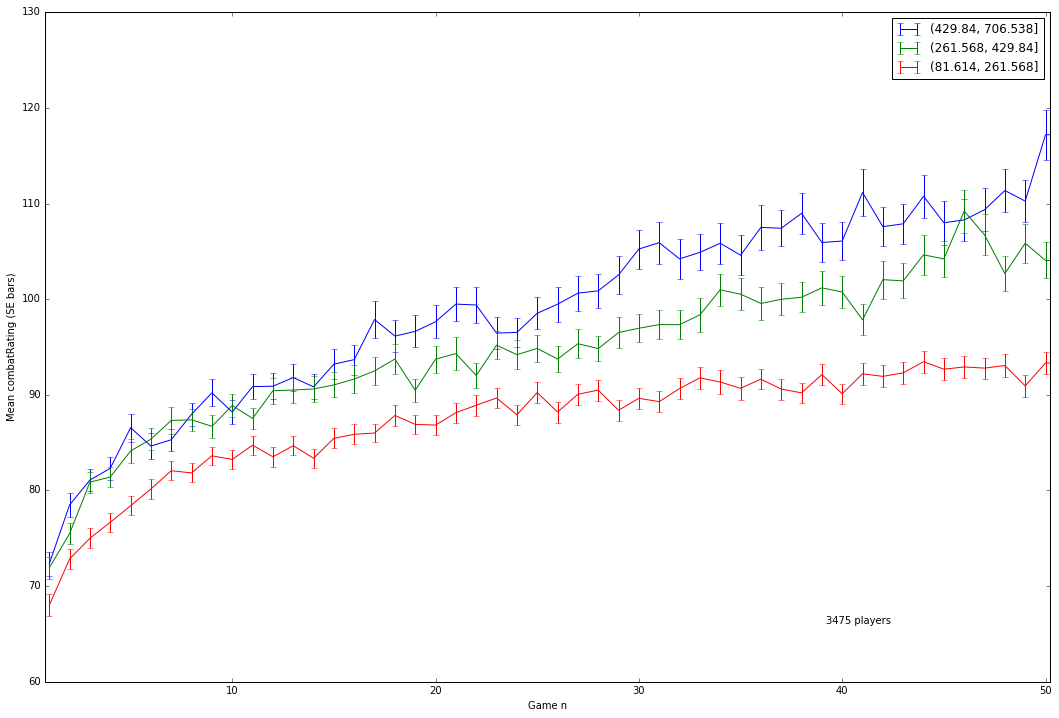

In [33]:
#find divisions between thirds on top scores
percentiles = [stats.scoreatpercentile(sf['top_cr_'].values, per) for per in range(0,120,33)]

#label players according to this
#sf.loc[:,'score_cat']=pd.cut(sf['top_cr_'],percentiles) #produces warning "Try using .loc[row_indexer,col_indexer] = value instead"

sf['score_cat']=pd.cut(sf['top_cr_'],percentiles) #produces warning "Try using .loc[row_indexer,col_indexer] = value instead"


#this would be better done using seaborn.tsplot
plt.clf()
for cat in sf['score_cat'].unique():
    try:
        mask=(sf['score_cat']==cat) & (sf['game_n']<(minimum_plays+2)) & np.isfinite(sf[perfvar])
        xvals=list(range(1,minimum_plays+2))
        #yvals=sf[mask].groupby('game_n')['killsDeathsRatio'].mean()    
        #ysems=sf[mask].groupby('game_n')['killsDeathsRatio'].sem()    
        yvals=sf[mask].groupby('game_n')[perfvar].mean()    
        ysems=sf[mask].groupby('game_n')[perfvar].sem()    
        xvals.append(10000);yvals[0]=0;ysems[0]=0 #see here for why I have to do this  http://stackoverflow.com/questions/35137961/pandas-plotting-with-yerr-gives-key-error-0        
        plt.errorbar(xvals,yvals,yerr=ysems,label=cat)
    except:
        print("NOT DONE for " + str(cat))

plt.xlim([0.8,minimum_plays+1.2])
plt.ylim([cRmin,cRmax])
plt.xlabel('Game n')
plt.ylabel('Mean ' + str(perfvar) + ' (SE bars)')
plt.annotate(labeltext,xy=(minimum_plays*0.8, cRmin*1.1),xycoords='data')
plt.legend(loc=0);

In [10]:
'''
now we're going to make a df of player, not game, level statistics
'''

#get max plays per ID
players=sf.groupby('destinyMembershipId')['max_plays'].mean().reset_index()



## Figure 2: Spacing

In [ ]:
sf=sf.groupby('destinyMembershipId').apply(findspacing,25) #get spacing of first 25 games

In [36]:
players=players.merge(sf[['destinyMembershipId','space25']].drop_duplicates(),how='left',left_on='destinyMembershipId',right_on='destinyMembershipId')

#figure out quartiles of grimoire score for each play level
q1=players['space25'].quantile(0.25)
q2=players['space25'].quantile(0.5)
q3=players['space25'].quantile(0.75)

minplay=50
maxplay=500
#divide all players according to weather they score above or below expected on their grimscore
spacers_=players[players['space25']>q3]['destinyMembershipId']
groupers=players[players['space25']<q1]['destinyMembershipId']

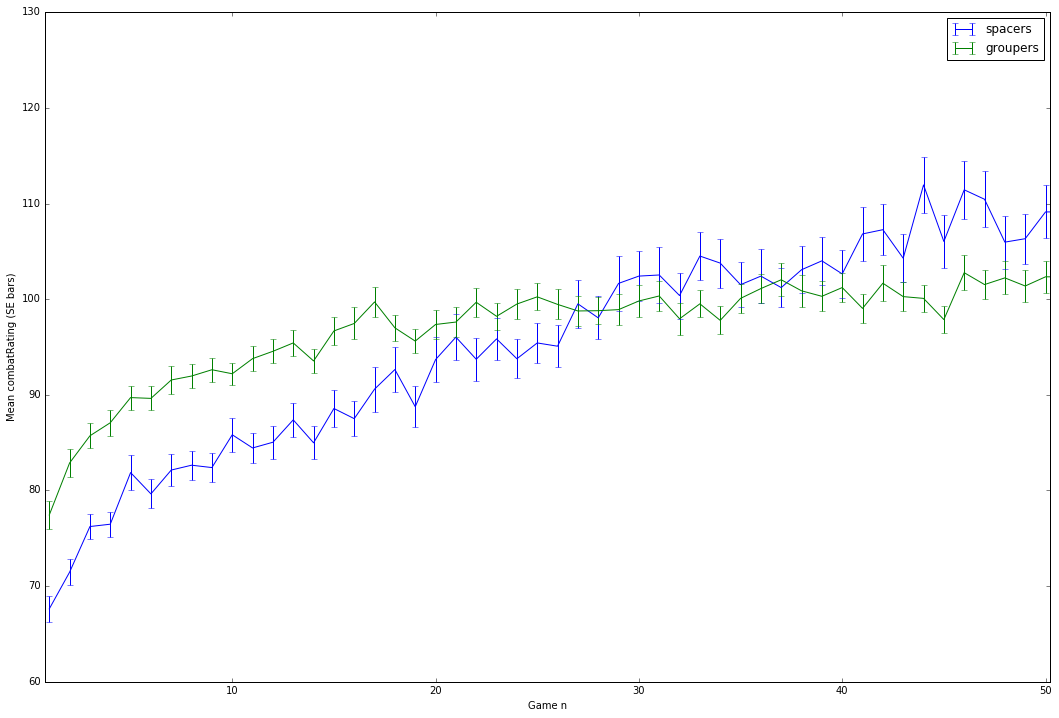

In [37]:
groups=[spacers_,groupers]
labels=['spacers','groupers']

plt.clf()
for i,group in enumerate(groups):
    mask=(sf['destinyMembershipId'].isin(group)) & (sf['max_plays']>(minplay)) & (sf['max_plays']<(maxplay)) & np.isfinite(sf[perfvar])
    xvals=list(range(1,minplay+1))    
    yvals=sf[mask].groupby('game_n')[perfvar].mean()    
    ysems=sf[mask].groupby('game_n')[perfvar].sem()    
    yvals=yvals[:minplay];ysems=ysems[:minplay]
    xvals.append(100000);yvals[0]=0;ysems[0]=0 #see here for why I have to do this  http://stackoverflow.com/questions/35137961/pandas-plotting-with-yerr-gives-key-error-0        
    plt.errorbar(xvals,yvals,yerr=ysems,label=labels[i])

plt.xlim([0.8,minplay+0.2])
plt.ylim([cRmin,cRmax])
plt.xlabel('Game n')
plt.ylabel('Mean ' + str(perfvar) + ' (SE bars)')
plt.legend(loc=0);

In [ ]:
#merge with grimoire scores
#some players have user IDs but not in rldat.csv
players=players.merge(gf,how='left',left_on='destinyMembershipId',right_on='userid')

#figure out quartiles of grimoire score for each play level
q1=players.groupby('max_plays')['grimscore'].quantile(0.25)
q2=players.groupby('max_plays')['grimscore'].quantile(0.5)

minplay=50
maxplay=500
#divide all players according to weather they score above or below expected on their grimscore
explorers_=players[players['grimscore']>q3[players['max_plays']]]['destinyMembershipId']
exploiters=players[players['grimscore']<q1[players['max_plays']]]['destinyMembershipId']
over_explo=players[players['grimscore']>q3[players['max_plays']]]['destinyMembershipId']    

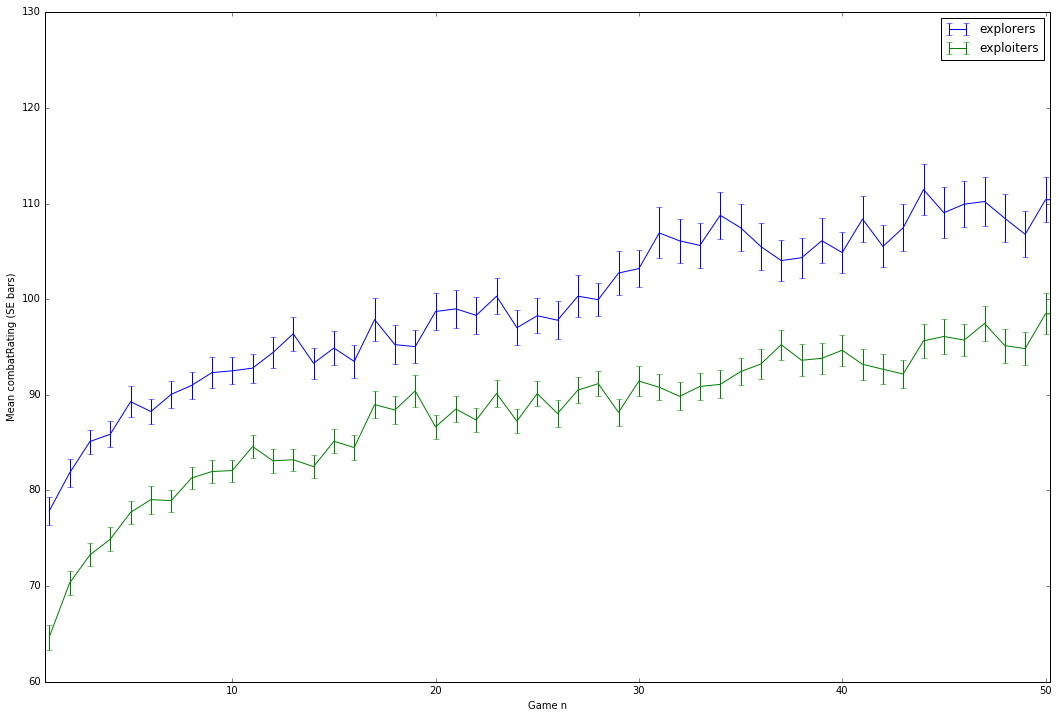

In [38]:
groups=[explorers_,exploiters]
labels=['explorers','exploiters']
plt.clf()


for i,group in enumerate(groups):
    mask=(sf['destinyMembershipId'].isin(group)) & (sf['max_plays']>(minplay)) & (sf['max_plays']<(maxplay)) & np.isfinite(sf[perfvar])
    xvals=list(range(1,minplay+1))
    yvals=sf[mask].groupby('game_n')[perfvar].mean()    
    ysems=sf[mask].groupby('game_n')[perfvar].sem()    
    yvals=yvals[:minplay];ysems=ysems[:minplay]
    xvals.append(100000);yvals[0]=0;ysems[0]=0 #see here for why I have to do this  http://stackoverflow.com/questions/35137961/pandas-plotting-with-yerr-gives-key-error-0        
    plt.errorbar(xvals,yvals,yerr=ysems,label=labels[i])

plt.xlim([0.8,minplay+0.2])
plt.ylim([cRmin,cRmax])
plt.xlabel('Game n')
plt.ylabel('Mean ' + str(perfvar) + ' (SE bars)')
plt.legend(loc=0);

In [39]:
'''
Z score grimscore against average for that number of plays and correlate that with CR line
'''

grim_mu=players.groupby('max_plays')['grimscore'].mean()
grim_sigma=players.groupby('max_plays')['grimscore'].std()

players['grimZ']=(players['grimscore']-grim_mu[players['max_plays']].values)/grim_sigma[players['max_plays']].values

In [44]:
sf['assistsX']=sf['killsDeathsAssists']-sf['killsDeathsRatio']

In [45]:
players=players.merge(sf[sf['game_n']<26].groupby('destinyMembershipId')['assistsX'].sum().reset_index(), how='left',left_on='destinyMembershipId',right_on='destinyMembershipId')
players['assists_rate']=players['assistsX']/25

mask=~players['assists_rate'].isnull()
q1=players[mask]['assists_rate'].quantile(0.25)
q2=players[mask]['assists_rate'].quantile(0.5)
q3=players[mask]['assists_rate'].quantile(0.75)

minplay=50
maxplay=100
#divide all players according to weather they score above or below expected on their grimscore
packplayers=players[players['assists_rate']>q1]['destinyMembershipId']
lonewolves_=players[players['assists_rate']<q3]['destinyMembershipId']

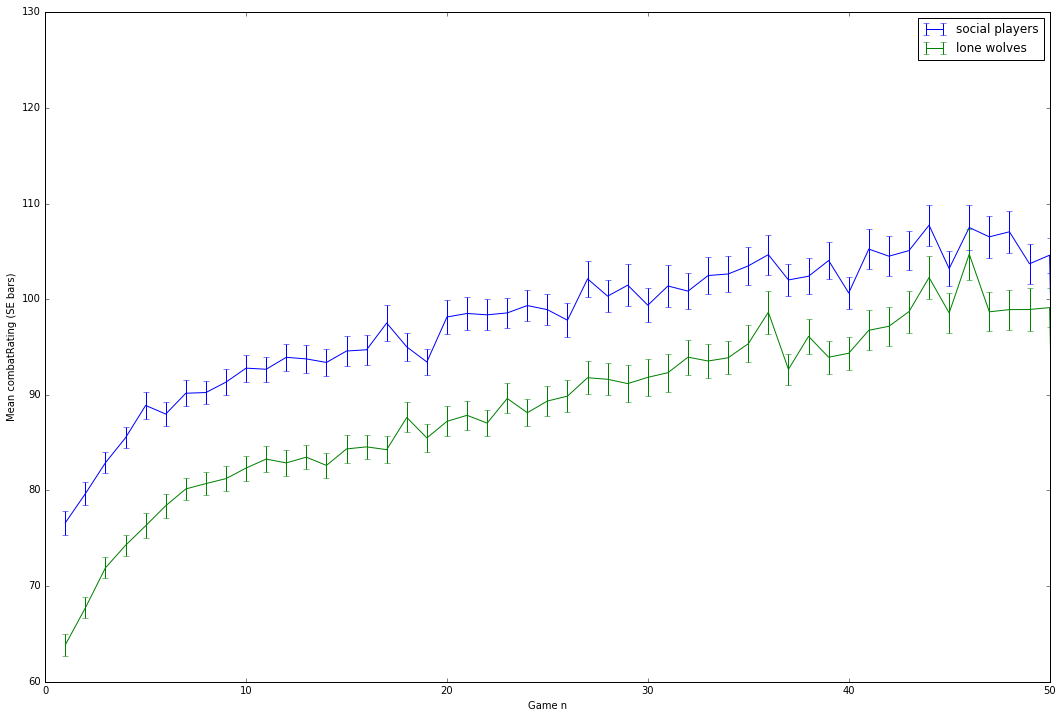

In [46]:
plt.clf()
xvals=list(range(1,minplay+2))

mask=(sf['destinyMembershipId'].isin(packplayers)) & (sf['max_plays']>(minplay)) & (sf['max_plays']<(maxplay)) & np.isfinite(sf[perfvar])
yvals=sf[mask].groupby('game_n')[perfvar].mean()    
ysems=sf[mask].groupby('game_n')[perfvar].sem()    
yvals=yvals[:minplay];ysems=ysems[:minplay]
yvals[0]=0;ysems[0]=0 #see here for why I have to do this  http://stackoverflow.com/questions/35137961/pandas-plotting-with-yerr-gives-key-error-0        
plt.errorbar(xvals,yvals,yerr=ysems,label='social players')

mask=(sf['destinyMembershipId'].isin(lonewolves_)) & (sf['max_plays']>(minplay)) & (sf['max_plays']<(maxplay)) & np.isfinite(sf[perfvar])
yvals=sf[mask].groupby('game_n')[perfvar].mean()    
ysems=sf[mask].groupby('game_n')[perfvar].sem()    
yvals=yvals[:minplay];ysems=ysems[:minplay]
yvals[0]=0;ysems[0]=0 #see here for why I have to do this  http://stackoverflow.com/questions/35137961/pandas-plotting-with-yerr-gives-key-error-0        
plt.errorbar(xvals,yvals,yerr=ysems,label='lone wolves')

plt.xlim([0,minplay])
plt.ylim([cRmin,cRmax])
plt.xlabel('Game n')
plt.ylabel('Mean ' + perfvar + ' (SE bars)')
#plt.annotate(labeltext,xy=(minimum_plays*0.8, .55),xycoords='data')
plt.legend(loc=0);

In [48]:
players=players.merge(pf,how='left',left_on='destinyMembershipId',right_on=['userid'])

In [49]:
mask=~players['eventEntropy25'].isnull()
q1=players[mask]['eventEntropy25'].quantile(0.25)
q2=players[mask]['eventEntropy25'].quantile(0.5)
q3=players[mask]['eventEntropy25'].quantile(0.75)

minplay=50
maxplay=100
#divide all players according to weather they score above or below expected on their grimscore
mode_explorers_=players[players['eventEntropy25']>q1]['destinyMembershipId']
mode_exploiters=players[players['eventEntropy25']<q3]['destinyMembershipId']

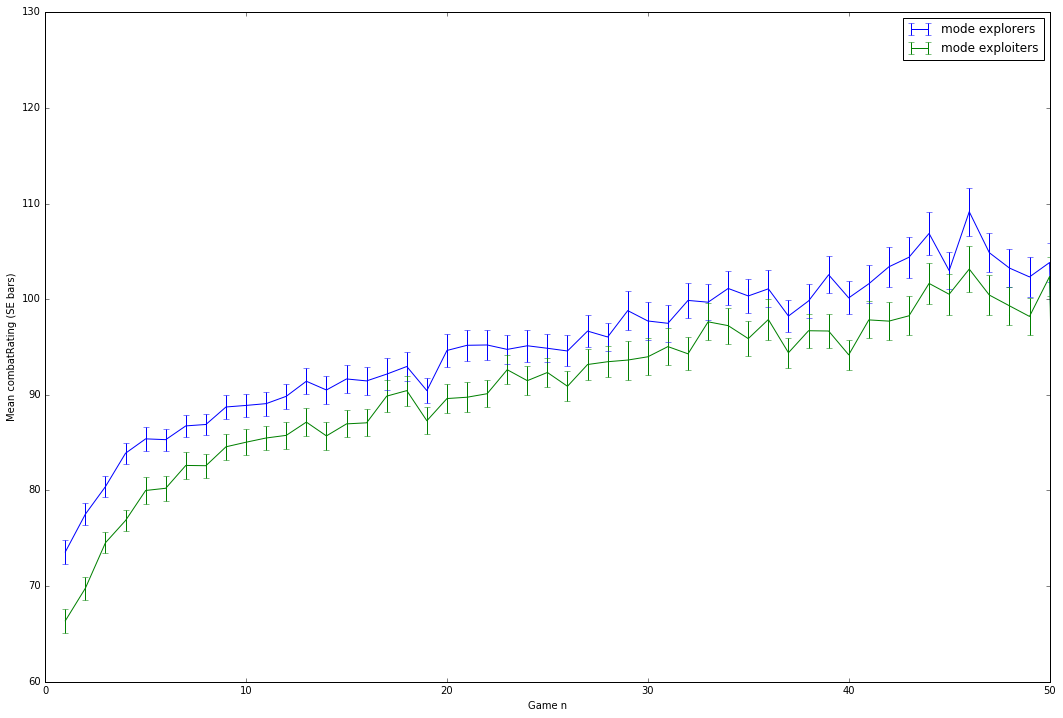

In [50]:
plt.clf()
xvals=range(1,minplay+2)

mask=sf['destinyMembershipId'].isin(mode_explorers_) & (sf['max_plays']>(minplay)) & (sf['max_plays']<(maxplay))  & np.isfinite(sf[perfvar])
yvals=sf[mask].groupby('game_n')[perfvar].mean()    
yvals=sf[mask].groupby('game_n')[perfvar].mean()    
ysems=sf[mask].groupby('game_n')[perfvar].sem()    
yvals=yvals[:minplay];ysems=ysems[:minplay]
yvals[0]=0;ysems[0]=0 #see here for why I have to do this  http://stackoverflow.com/questions/35137961/pandas-plotting-with-yerr-gives-key-error-0        
plt.errorbar(xvals,yvals,yerr=ysems,label='mode explorers')

mask=sf['destinyMembershipId'].isin(mode_exploiters) & (sf['max_plays']>(minplay)) & (sf['max_plays']<(maxplay)) & np.isfinite(sf[perfvar])
yvals=sf[mask].groupby('game_n')[perfvar].mean()    
yvals=sf[mask].groupby('game_n')[perfvar].mean()    
ysems=sf[mask].groupby('game_n')[perfvar].sem()    
yvals=yvals[:minplay];ysems=ysems[:minplay]
yvals[0]=0;ysems[0]=0 #see here for why I have to do this  http://stackoverflow.com/questions/35137961/pandas-plotting-with-yerr-gives-key-error-0        
plt.errorbar(xvals,yvals,yerr=ysems,label='mode exploiters')

plt.xlim([0,minplay])
plt.ylim([cRmin,cRmax])
plt.xlabel('Game n')
plt.ylabel('Mean ' + perfvar + ' (SE bars)')
#plt.annotate(labeltext,xy=(minimum_plays*0.8, .55),xycoords='data')
plt.legend(loc=0);

In [51]:
players[['destinyMembershipId','CR_slope','CR_intercept','max_plays','space25','assists_rate','grimZ','eventEntropy25']].to_csv('forR.csv')

#now it is easiest to run this in R

In [52]:
os.system("sudo Rscript regmodel.R")

256

In [53]:
#now we can load data from regression
slope_betas=pd.read_csv("slope_betas.csv")
slope_se=pd.read_csv("slope_se.csv")
intercept_betas=pd.read_csv("intercept_betas.csv")
intercept_se=pd.read_csv("intercept_se.csv")






yvalsS=slope_betas[1:]['x'].values
ysemsS=slope_se[1:]['x'].values
yvalsI=intercept_betas[1:]['x'].values
ysemsI=intercept_se[1:]['x'].values

xvalsS=range(len(yvalsS))
xvalsI=[xv+0.2 for xv in xvalsS]
plt.clf()
plt.errorbar(xvalsS,yvalsS,yerr=ysemsS,marker='o',color='b',fmt='none',label='Slope')
plt.plot(xvalsS,yvalsS,marker='o',ls='',color='b')
plt.errorbar(xvalsI,yvalsI,yerr=ysemsI,marker='s',color='g',fmt='none',label='Intercept')
plt.plot(xvalsI,yvalsI,marker='s',ls='',color='g')
plt.plot([-1,5],[0,0],'k')
plt.ylabel('standardised regression coefficient (beta)')
plt.xlim([-0.25,4.45])
plt.legend(loc=0)

labels=['games played','spacing','social play','grimoire','event entropy']
plt.xticks([x+0.1 for x in xvalsS], labels, rotation=23)

OSError: File b'slope_betas.csv' does not exist